# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
#total_rides

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']
#total_drivers

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(['type'])['fare'].sum()
#total_fares

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares/total_rides
#average_fare_per_ride

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares/total_drivers
#average_fare_per_driver

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_data_summary_df = pd.DataFrame({
    'Total Rides' : total_rides,
    'Total Drivers' : total_drivers,
    'Total Fares' : total_fares,
    'Average Fare per Ride' : average_fare_per_ride,
    'Average Fare per Driver' : average_fare_per_driver
})
#pyber_data_summary_df

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_data_summary_df.index.name = None
#pyber_data_summary_df

In [10]:
#  8. Format the columns.
pyber_data_summary_df['Total Rides'] = pyber_data_summary_df['Total Rides'].map("{:,}".format)

pyber_data_summary_df['Total Drivers'] = pyber_data_summary_df['Total Drivers'].map("{:,}".format)

pyber_data_summary_df['Total Fares'] = pyber_data_summary_df['Total Fares'].map("${:,.2f}".format)

pyber_data_summary_df['Average Fare per Ride'] = pyber_data_summary_df['Average Fare per Ride'].map("${:,.2f}".format)

pyber_data_summary_df['Average Fare per Driver'] = pyber_data_summary_df['Average Fare per Driver'].map("${:,.2f}".format)

pyber_data_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(['date', 'type']).sum()[['fare']]
df.head(10)

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
2019-01-01 09:45:36,Rural,43.69
2019-01-01 12:32:48,Suburban,25.56
2019-01-01 14:40:14,Urban,5.42
2019-01-01 14:42:25,Urban,12.31


In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()
#date_type_fare_df

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_pivot = df.pivot(index='date', columns='type', values='fare')
#df_pivot.head(10)

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
dated_df = pd.DataFrame(df_pivot.loc['2019-01-01':'2019-04-29'])
#dated_df.head(10)

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
dated_df.index = pd.to_datetime(dated_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
dated_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
week_dated_df = dated_df.resample("W").sum()
#week_dated_df

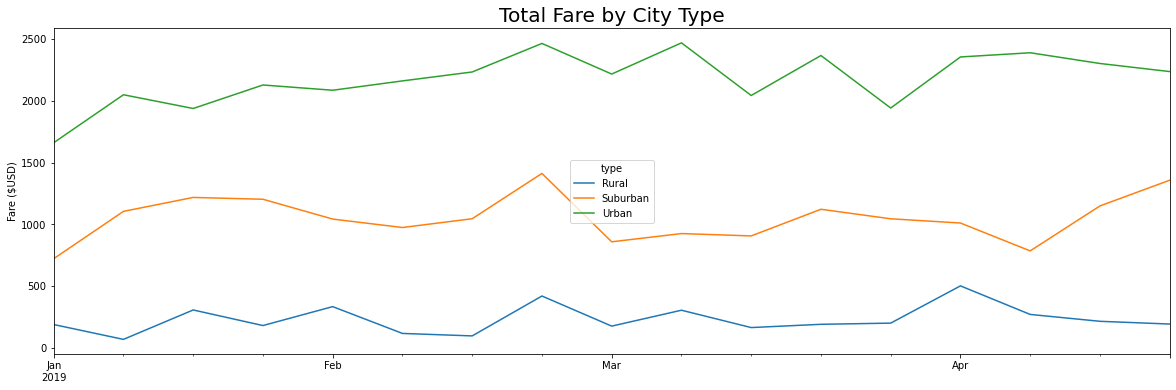

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
week_dated_df.plot(kind = 'line', figsize=(20, 6))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.title('Total Fare by City Type')
plt.ylabel('Fare ($USD)')
plt.xlabel('')
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()